In this notebook we clean the LAPD Crime Data for analysis

In [ ]:
from preprocessing import fetch_data
from utils import DESC_VARIABLES

In [3]:
df = fetch_data()
df

Loading data from existing parquet: lapd_offenses_victims_merged.parquet


,caseno,uniquenibrno,date_rptd,date_occ,time_occ,area_name,rpt_dist_no,totaloffensecount,group,nibr_description,...,gang_related_crime,transit_related_crime,homeless_victim_crime,homeless_suspect_crime,homeless_arrestee_crime,uniquevictimno,vict_age,vict_descent,vict_sex,victim_type
0,25071666,25071666_13B_0,2025-04-23,2025-04-23,08:55:00,Hollywood,638,1,A,242 - PC - M - Battery On Person - Simple - 13B,...,False,True,False,False,False,25071666_0,52,Hispanic,F,Person
1,25193121,25193121_23G_0,2025-10-13,2025-10-11,17:00:00,Van Nuys,939,1,A,459 - PC - F - BFMV - Theft Of Motor Vehicle P...,...,False,False,False,False,False,25193121_0,20,White/Caucasian,F,Person
2,24088556,24088556_13B_0,2024-11-22,2024-11-22,21:00:00,West Valley,1018,2,A,243(E)(1) - PC - M - Intimate Partner Battery ...,...,False,False,False,False,False,24088556_0,41,Other Asian,F,Person
3,25087123,25087123_13B_0,2025-05-14,2025-05-13,20:00:00,Devonshire,1799,1,A,243(A) - PC - M - Battery On Person - Simple -...,...,False,False,False,False,False,25087123_0,59,Filipino,F,Person
4,25188446,25188446_240_0,2025-10-07,2025-10-07,07:50:00,Hollenbeck,497,1,A,487(D)(1) - PC - M - Grand Theft - Auto - Moto...,...,False,False,False,False,False,25188446_0,60,Hispanic,M,Person
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243634,25186004,25186004_240_0,2025-10-03,2025-10-02,19:00:00,N Hollywood,1517,1,A,487(D)(1) - PC - F - Grand Theft Auto - GTA -...,...,False,False,False,False,False,25186004_0,31,Hispanic,F,Person
243635,C259038857,C259038857_23C_0,2025-09-28,2025-09-26,18:41:00,Topanga,2156,1,A,459.5(A) - PC - M - Petty Theft - Shoplifting ...,...,False,False,False,False,False,C259038857_0,<NA>,None,None,Business
243636,25100411,25100411_13B_0,2025-06-01,2025-06-01,03:00:00,Central,135,1,A,273.5(A) - PC - F - IPV w/ Injury - Simple Ass...,...,False,False,True,False,False,25100411_0,58,White/Caucasian,F,Person
243637,C259039429,C259039429_290_0,2025-09-16,2025-09-16,06:44:00,Devonshire,1728,1,A,594(B)(2)(A) - PC - M - Vandalism Less Than $4...,...,False,False,False,False,False,C259039429_0,64,White/Caucasian,F,Person


In [4]:
# Check data types and find mixed types
print("Current dtypes:")
print(df.dtypes)
print("\n")

# Check for mixed types by examining each column
for col in df.columns:
    unique_types = df[col].apply(type).unique()
    if len(unique_types) > 1:
        print(f"Column '{col}' has mixed types: {unique_types}")
        print(f"Sample values: {df[col].head(10).tolist()}")
        print()

Current dtypes:
caseno                     string[python]
uniquenibrno               string[python]
date_rptd                  datetime64[ns]
date_occ                   datetime64[ns]
time_occ                           object
area_name                        category
rpt_dist_no                        object
totaloffensecount                   Int64
group                              object
nibr_description                 category
crime_against                      object
premis_desc                        object
weapon_desc                        object
status_desc                      category
totalvictimcount                    Int64
victim_shot                          bool
domestic_violence_crime              bool
hate_crime                           bool
gang_related_crime                   bool
transit_related_crime                bool
homeless_victim_crime                bool
homeless_suspect_crime               bool
homeless_arrestee_crime              bool
uniquevictimno    

In [5]:
df.columns

Index(['caseno', 'uniquenibrno', 'date_rptd', 'date_occ', 'time_occ',
       'area_name', 'rpt_dist_no', 'totaloffensecount', 'group',
       'nibr_description', 'crime_against', 'premis_desc', 'weapon_desc',
       'status_desc', 'totalvictimcount', 'victim_shot',
       'domestic_violence_crime', 'hate_crime', 'gang_related_crime',
       'transit_related_crime', 'homeless_victim_crime',
       'homeless_suspect_crime', 'homeless_arrestee_crime', 'uniquevictimno',
       'vict_age', 'vict_descent', 'vict_sex', 'victim_type'],
      dtype='object')

In [ ]:
for var in DESC_VARIABLES:
    print("\n")
    print(f"Value counts for variable: {var}")
    print(df[var].value_counts(dropna=False))



Value counts for variable: area_name
area_name
Central        15947
77th Street    15627
Olympic        15423
N Hollywood    14321
Newton         13505
Rampart        13238
Hollywood      13094
Southwest      12975
Southeast      12526
Van Nuys       11993
Topanga        11846
West Valley    11250
Devonshire     11237
Northeast      10628
Pacific         9715
Hollenbeck      9583
Mission         8811
Wilshire        8511
Foothill        8503
West LA         8180
Harbor          6726
Name: count, dtype: int64


Value counts for variable: totaloffensecount
totaloffensecount
1    177177
2     54774
3      8394
4      2096
5       700
6       282
7       175
8        32
9         9
Name: count, dtype: Int64


Value counts for variable: group
group
A       226949
B        12884
None      3806
Name: count, dtype: int64


Value counts for variable: nibr_description
nibr_description
594(B)(1) - PC - F - Vandalism ($400 Or More) - Felony - 290                  14478
243(A) - PC - M - Battery 

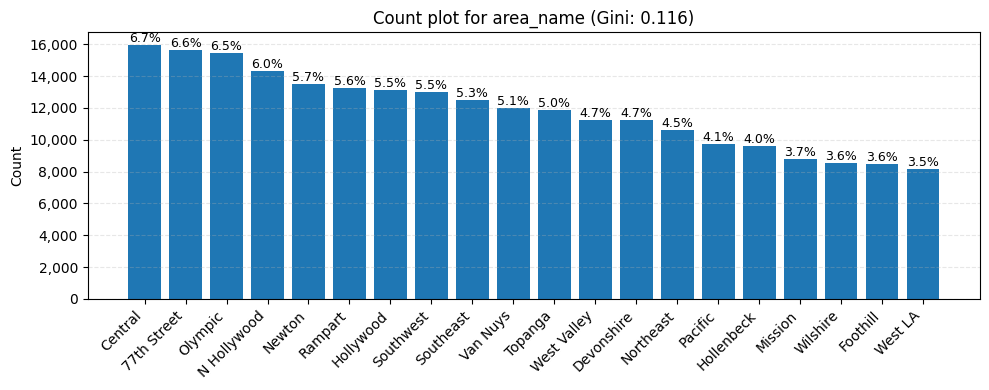

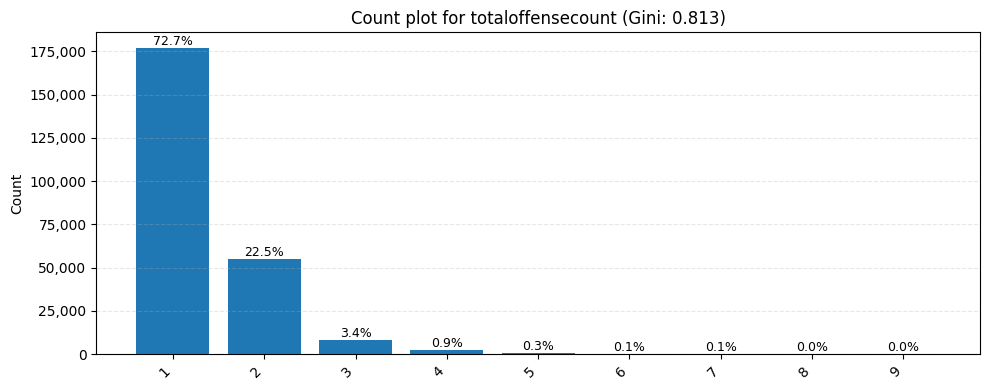

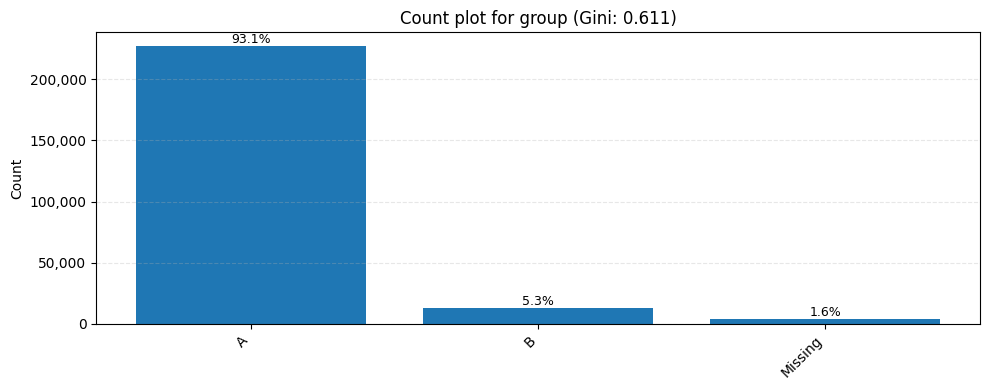

C:\Users\manuz\AppData\Local\Temp\ipykernel_8796\372712707.py:44: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


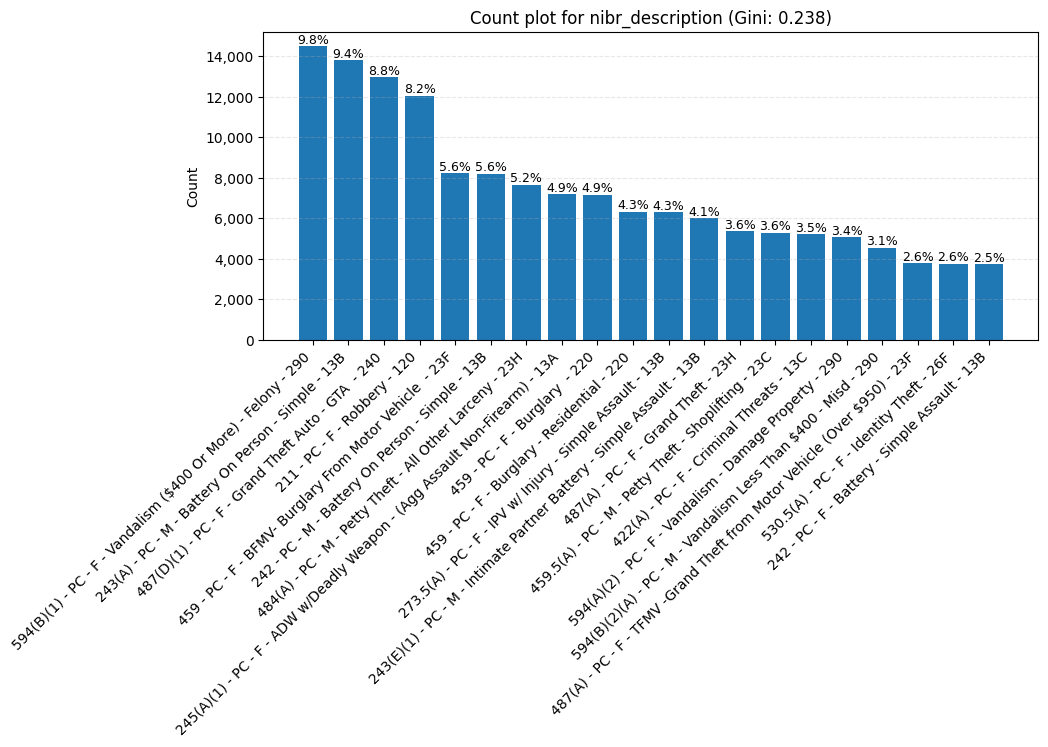

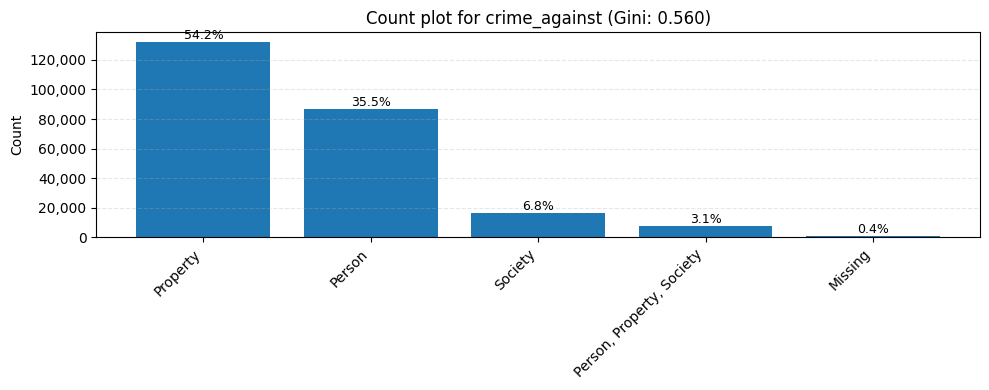

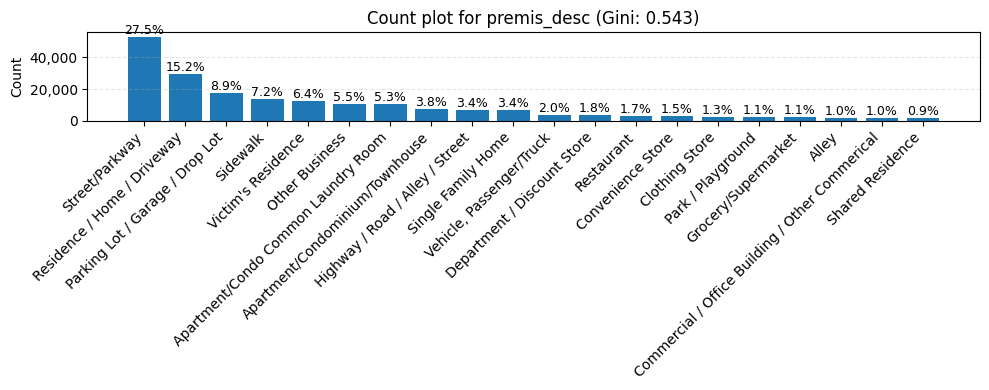

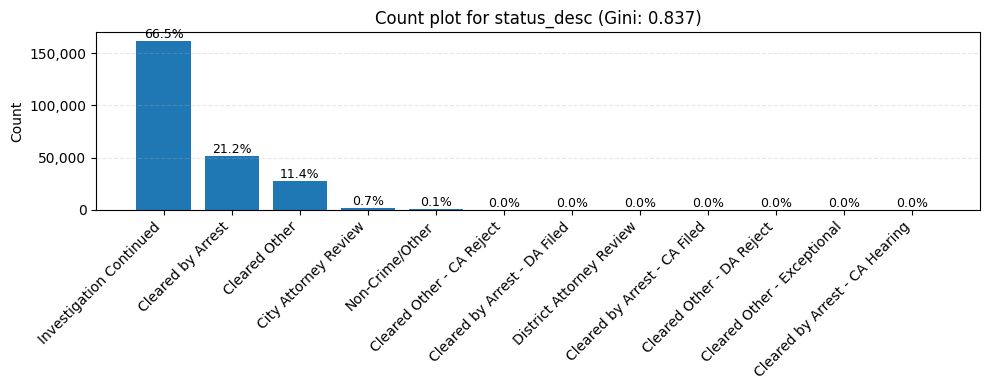

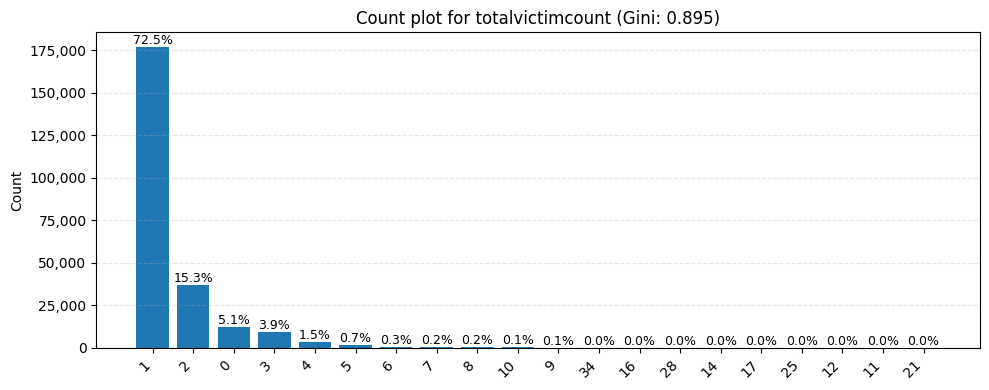

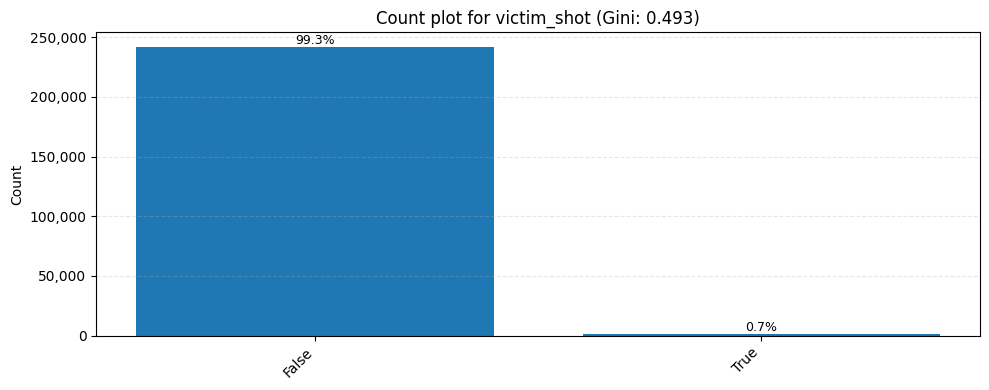

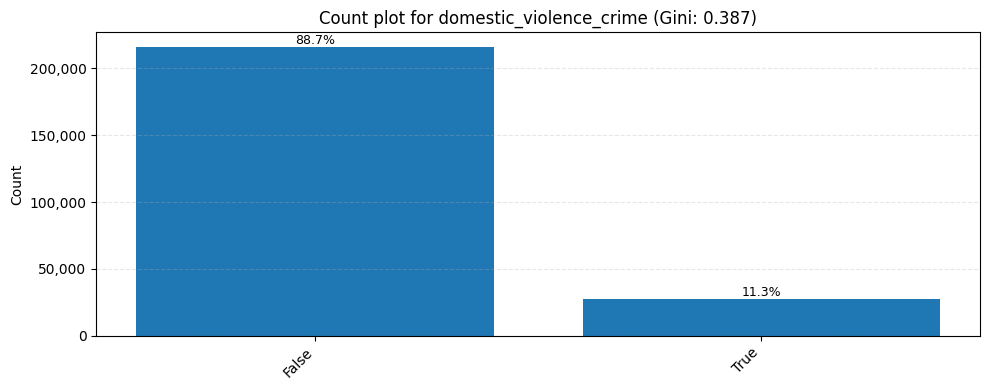

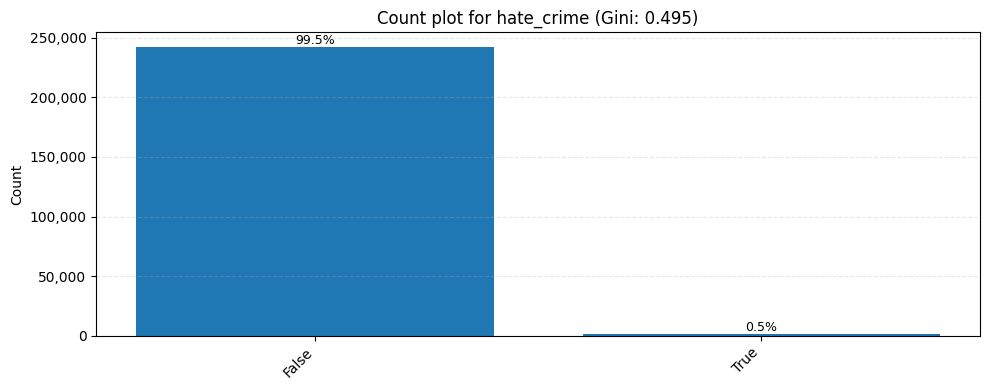

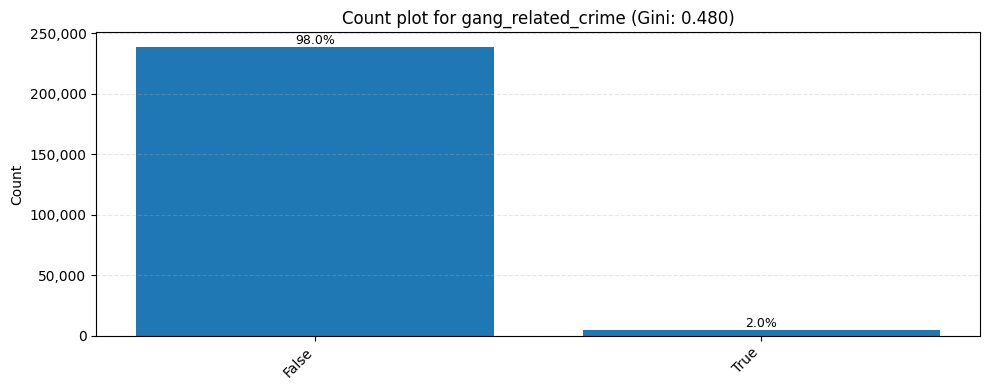

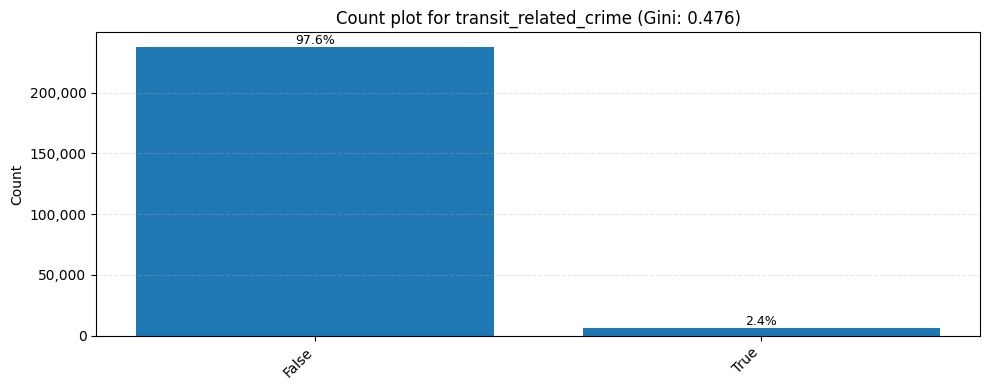

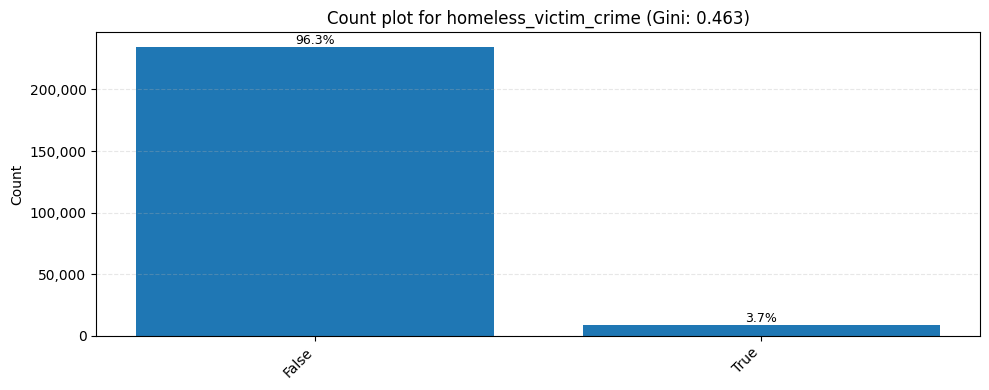

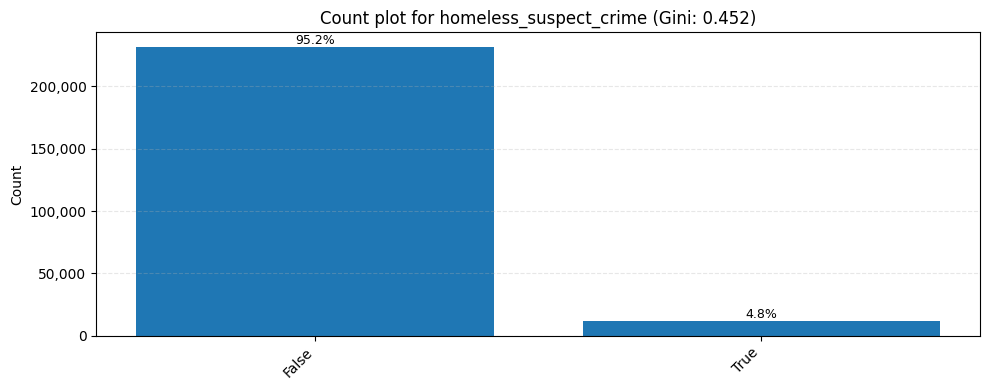

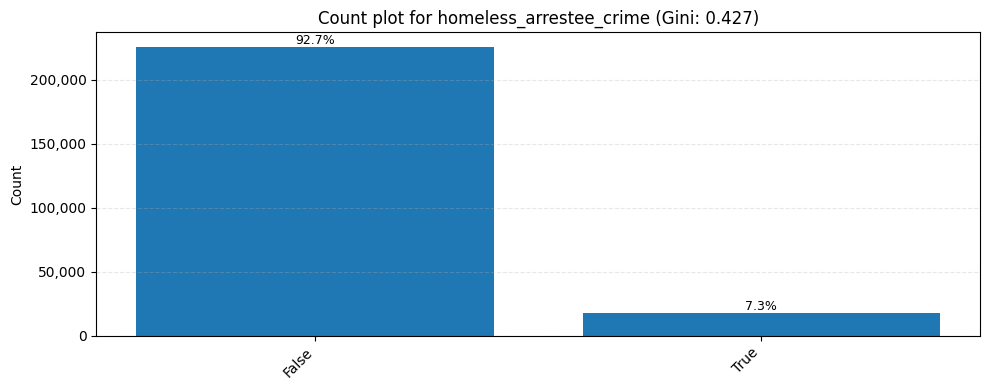

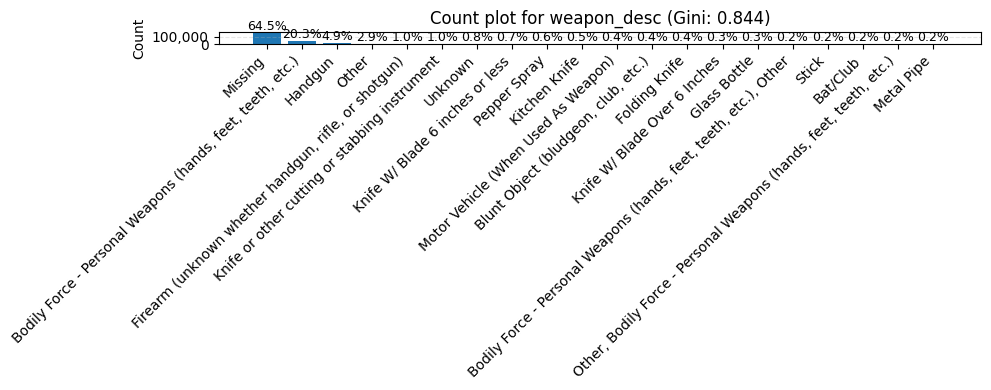

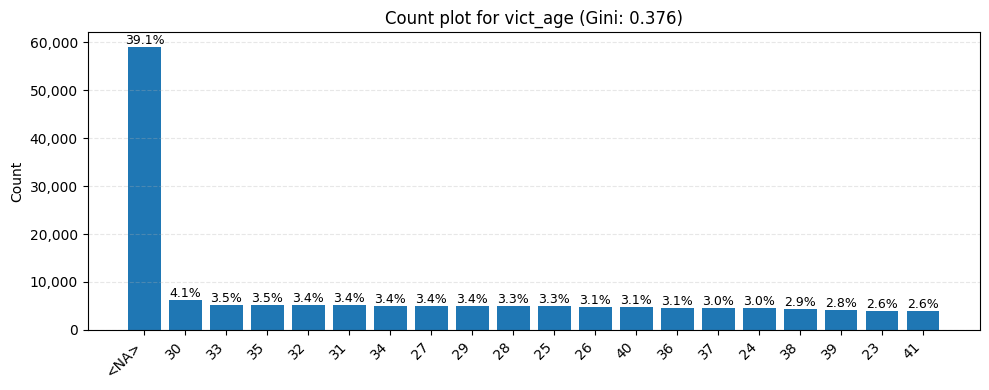

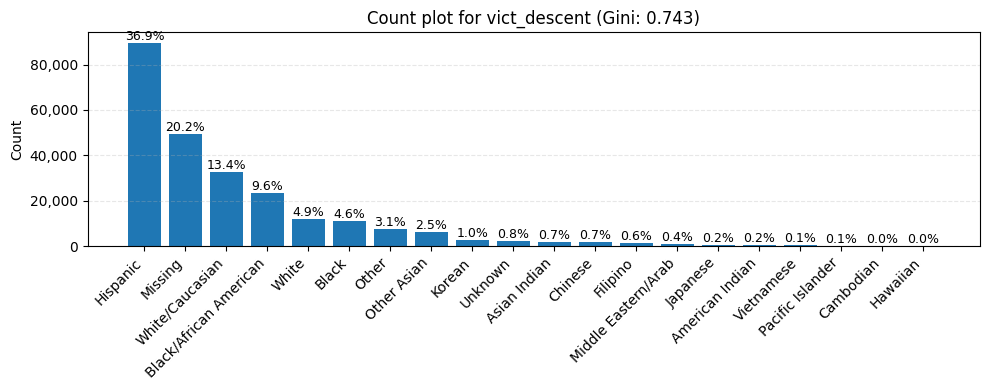

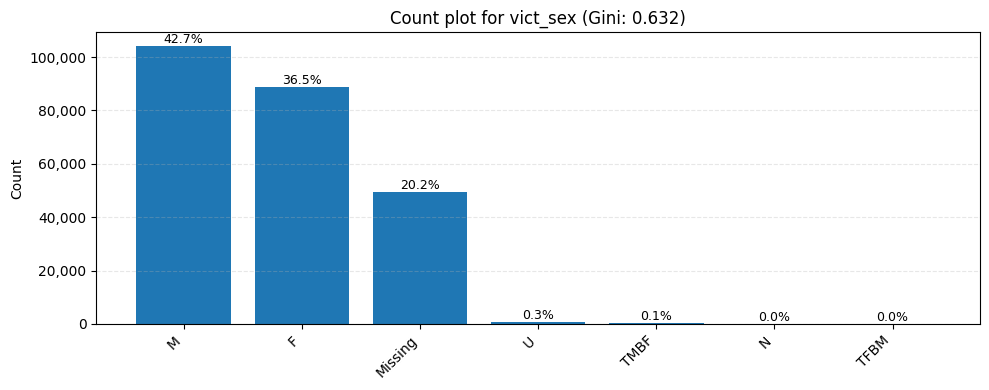

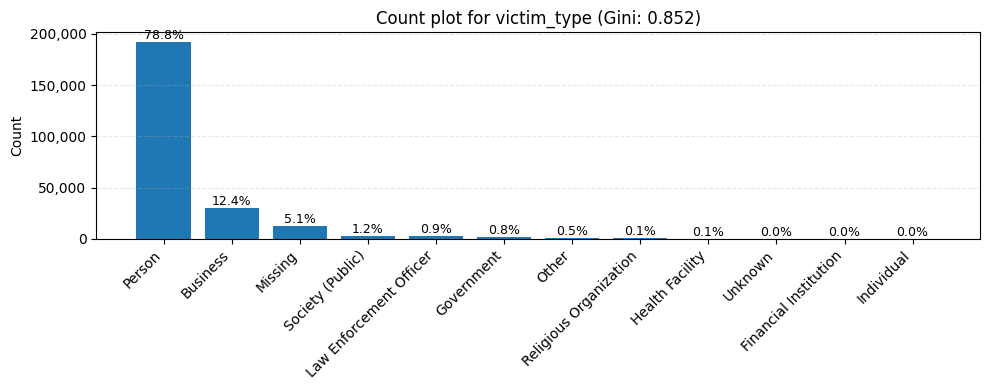

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def gini_coefficient(values):
    """Calculate Gini coefficient (0 = perfectly equal, 1 = perfectly unequal)."""
    sorted_values = np.sort(values)
    n = len(sorted_values)
    index = np.arange(1, n + 1)
    return (2 * np.sum(index * sorted_values)) / (n * np.sum(sorted_values)) - (n + 1) / n

for var in DESC_VARIABLES:
    # Get value counts including None
    value_counts = df[var].value_counts(dropna=False)
    
    # Keep top 20 if more than 20 unique values
    if len(value_counts) > 20:
        value_counts = value_counts.head(20)
    
    # Calculate Gini coefficient
    gini = gini_coefficient(value_counts.values)
    
    # Create figure
    plt.figure(figsize=(10, 4))
    ax = plt.bar(range(len(value_counts)), value_counts.values)
    plt.xticks(range(len(value_counts)), 
               [str(x) if x is not None else 'Missing' for x in value_counts.index],
               rotation=45, ha="right")
    plt.title(f"Count plot for {var} (Gini: {gini:.3f})")
    plt.ylabel("Count")
    
    # Format y-axis with thousands separator
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))
    
    # Add percentage labels on top of bars
    total = value_counts.sum()
    for i, (bar, count) in enumerate(zip(ax, value_counts.values)):
        percentage = (count / total) * 100
        plt.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
                f'{percentage:.1f}%',
                ha='center', va='bottom', fontsize=9)
    
    plt.grid(True, axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()